<a href="https://colab.research.google.com/github/alanhc2022/Web-Scraping/blob/main/PRUEBA/Untitled4_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## _Análisis de datos y uso de Naive Bayes para predecir el éxito de una campaña de marketing bancario_

**_Naive Bayes_**

- Los clasificadores Bayesianos buscan responder a la pregunta: "basados en los valores observados de los predictores, ¿Cuál es la probabilidad de que el resultados sea la clase $C_K$?.
<br>

- Se encuentra basado en el teorema de Bayes-Price.
<br>

- Estudios comparativos de diversos algoritmos de clasificación han encontrado que Naive Bayes es comparable en performance a los árboles de decisión y las redes neuronales.
<br>

- Suelen tener alta precisión y rapidez cuando son aplicados a grandes bases de datos.
<br>

- Una asunción importante es que el efecto del valor de un atributo para una clase dada es independiente de los valores del resto de los atributos (Independencia Condicional dentro de clases).
<br>

- El supuesto anterior simplifica los cálculos, por eso recibe el nombre de $Naive$.

### _Contenido_



**_1.-Contexto del proyecto_**

**_2.-Objetivo_**

**_3.-Importación de librerías a utilizar_**

**_4.-Importación de datos_**

**_5.-Exploración de datos_**

**_6.-Preprocesamiento de datos_**

**_7.-Entrenamiento del modelo_**

**_8.-Conclusiones finales_**


# 1.-**_Contexto del proyecto:_**

*_Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requirió más de un contacto con el mismo cliente, para acceder si el producto (depósito a plazo bancario) sería ('sí') o no ('no') suscrito_*

**_Descripción de variables_**

*_Variables de entrada_*


*_1 - edad (numérico)_*

*_2 - trabajo: tipo de trabajo (categórico: "admin.", "desconocido", "desempleado", "gerente", "empleada doméstica", "empresario", "estudiante", "obrero", "autónomo", "jubilado", "técnico", "servicios")_*

*_3 - estado civil: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)_*

*_4 - educación (categórico: "desconocido", "secundario", "primario", "terciario")_*

*_5 - mora: ¿tiene crédito en mora? (binario: "sí", "no")_*

*_6 - saldo: saldo medio anual, en euros (numérico)_*

*_7 - vivienda: ¿tiene préstamo de vivienda? (binario: "sí", "no")_*

*_8 - préstamo: ¿tiene préstamo personal? (binario: "sí", "no")_* # relacionado con el último contacto de la campaña actual

*_9 - contacto: tipo de comunicación del contacto (categórico: "desconocido", "teléfono", "celular")_*

*_10 - día: último día del mes del contacto (numérico)_*

*_11 - mes: último mes del año del contacto (categórico: "ene", "feb", "mar", ..., "nov", "dic")_*

*_12 - duración: duración del último contacto, en segundos (numérico)_* # otros atributos

*_13 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)_*

*_14 - pdays: número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)_*

*_15 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)_*

*_16 - poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")_*

*_Variable de salida o variable objetivo("y")_*

*_17-y-Si el cliente suscribió un depósito a plazo (binario: "sí", "no")_*

**Fuente :**
    
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

# 2.-**_Objetivo_**

*_El objetivo de la clasificación es predecir si el cliente suscribirá (sí=1 / no=0) un depósito a plazo (variable y)._*

# 3.-**_Importación de librerías necesarias_**

In [ ]:
import os            #Para Direccionar la ruta de trabajo
import pandas as pd  #Para trabajar con DataFrames
import numpy as np   #Para manejo de arraysa
import json5         #Para importar jsons
import psycopg2      #Para conexión a motor de Postgres
import pyodbc        #Para conexión a motor de Sql Server
import requests      #Para trabajar con APIs libres
import tweepy        #Para trabajar con el API de twitter
import matplotlib.pyplot as plt  # para el gràfico de barras

# Para codificar los predictores cualitativos
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

# Para el balanceo de datos
#pip install --upgrade imbalanced-learn
#!pip install scikit-learn imbalanced-learn
#!pip install scikit-learn==0.24.2
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler


# 4.-**_Importarción de los datos_**

In [ ]:
#Directorio de trabajo actual
os.getcwd()

'C:\\Users\\MibsanTZ\\Downloads\\proyecto'

In [ ]:
# direccionando mi archivo de trabajo
os.chdir(r"C:\Users\MibsanTZ\Downloads\proyecto")

In [ ]:
#Importando el archivo de trabajo
csv="bank_full.csv"

In [ ]:
banca = pd.read_csv(csv, sep=";")
banca.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


# 5.-**_Exploración de los datos_**

*_En primera instancia vamos a valorar la estructura del dataset, conocer la clase de variables con las que vamos a trabajar y si dentro del dataset encontramos missing values que puedan dificultar la gestión de los datos. En este caso, no hay ningún NA, lo que nos hace trabajar el dataset sin ningún problema._*

In [ ]:
# Observamos cuantos valores faltantes hay en cada variable
banca.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#Obtener la informacion del dataframe
banca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Ver la dimensión del DataFrame
dim =banca.shape
dim

(45211, 17)

*_Una vez realizado un primer análisis de la estructura de los datos(banca), se lleva a cabo un análisis visual para facilitar la compresión de los datos. Para ello, podemos llevar a cabo una gran variedad de puntos y visualizaciones. En este caso, a modo de muestra simplemente visualizaremos un histograma con la edad respecto al dataset._*

*_Dentro de este punto podemos explorar aspectos como:_*

*_<b>.</b> Correlación de edad, estado sentimental y trabajo en la aceptación/no de un depósito._*

*_<b>.</b> Posibilidad de renovación del depósito en base a un histórico anterior._*

*_<b>.</b> Número de contactos por qué medio y tasas de éxito (alternativas de mejora del proceso)_*

In [ ]:
import seaborn as sns


C:\Users\MibsanTZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


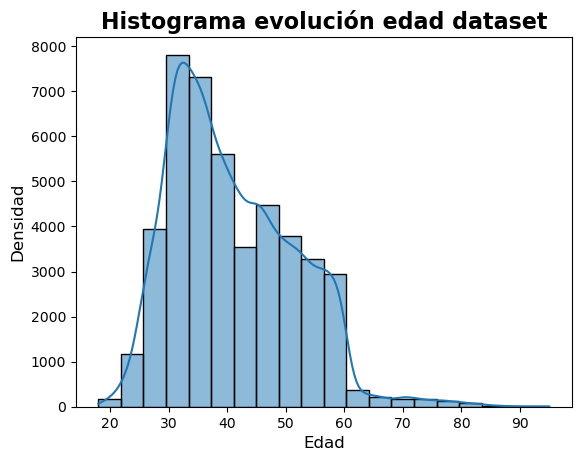

In [ ]:
# histograma
sns.histplot(banca['age'], bins=20, kde=True, color='#1f77b4')  # Azul en formato hexadecimal

# Título y etiquetas de los ejes
plt.title("Histograma evolución edad dataset", fontsize=16, fontweight='bold')
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Densidad", fontsize=12)

# Mostrar el gráfico
plt.show()

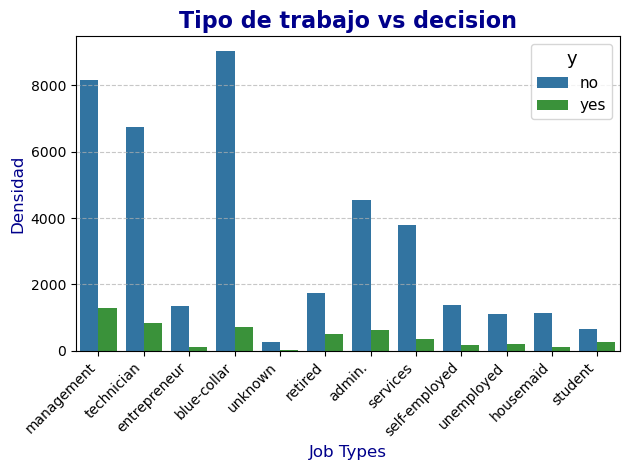

In [ ]:

# gráfico de barras
sns.countplot(x='job', hue='y', data=banca, palette=['#1f77b4', '#2ca02c'])  # Azul y verde como colores personalizados

# Título y etiquetas
plt.title("Tipo de trabajo vs decision", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Job Types", fontsize=12, color='darkblue')
plt.ylabel("Densidad", fontsize=12, color='darkblue')
# Leyenda
plt.legend(title='y', title_fontsize='13', fontsize='11', loc='upper right')
# Mejorar visualización
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas para una mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula para mejorar la visualización

# Mostrar el gráfico
plt.tight_layout()  # Ajustar para evitar solapamientos
plt.show()

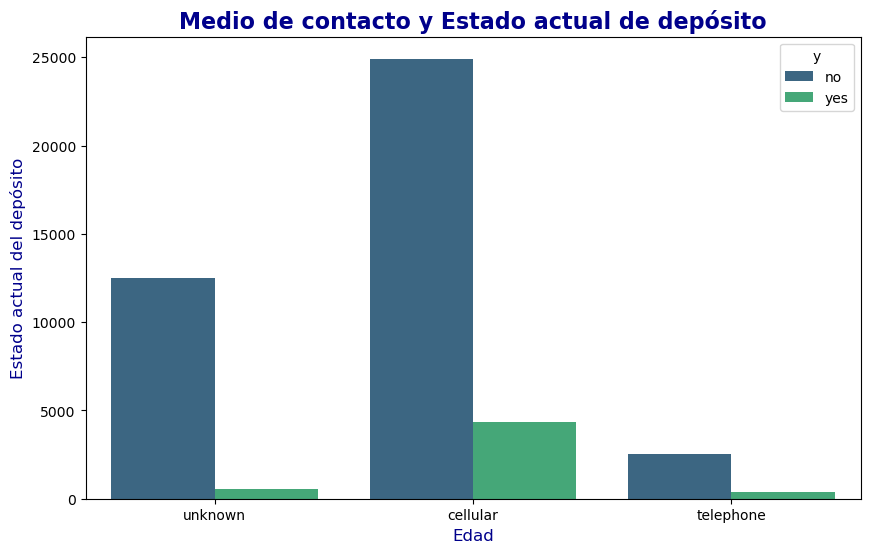

In [ ]:
# Gráfico de barras con el conteo de las categorías
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', hue='y', data=banca, palette='viridis')

# Títulos y etiquetas
plt.title("Medio de contacto y Estado actual de depósito", fontsize=16,fontweight='bold', color='darkblue')
plt.xlabel("Edad", fontsize=12, color='darkblue')
plt.ylabel("Estado actual del depósito", fontsize=12, color='darkblue')

# Mostrar el gráfico
plt.show()

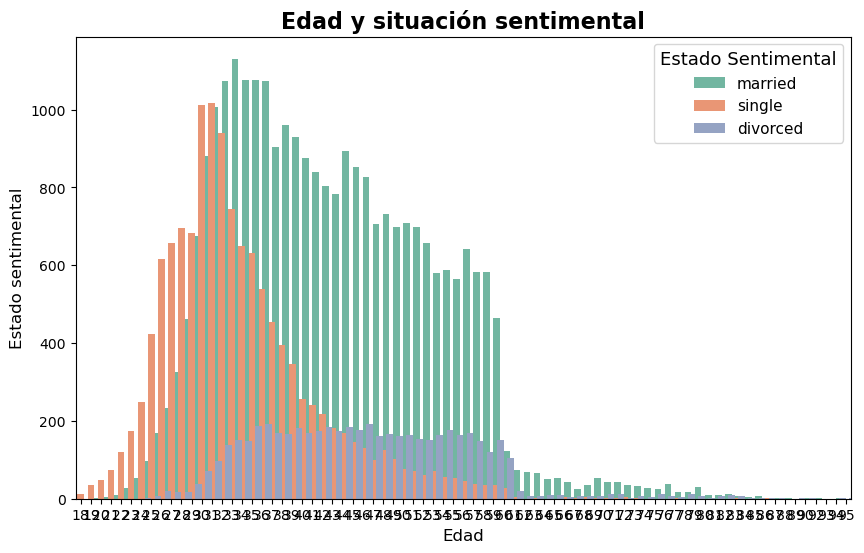

In [ ]:
# Crear el gráfico de barras con barras más anchas
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='marital', data=banca, palette='Set2', width=2)  # Ajustar el parámetro width

# Título y etiquetas
plt.title("Edad y situación sentimental", fontsize=16, fontweight='bold')
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Estado sentimental", fontsize=12)

# Agregar la leyenda
plt.legend(title='Estado Sentimental', title_fontsize='13', fontsize='11', loc='upper right')

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear la tabla de frecuencias para la columna 'y' en el DataFrame 'banca'
reparto_y = banca['y'].value_counts()
print(reparto_y)

y
no     39922
yes     5289
Name: count, dtype: int64


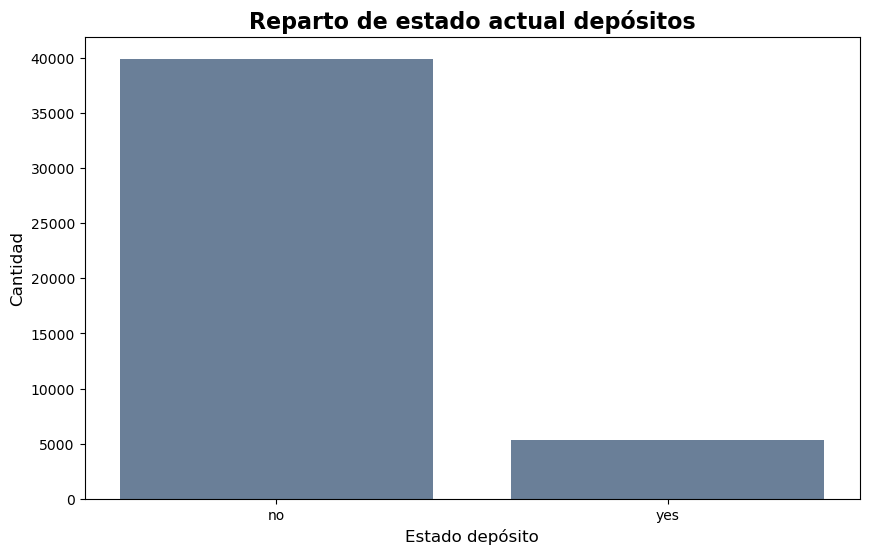

In [ ]:
# Crear el gráfico de barras con color azul gris
plt.figure(figsize=(10, 6))
plt.bar(reparto_y.index, reparto_y.values, color='#6a7f98')  # Azul gris (#6a7f98)

# Título y etiquetas
plt.title("Reparto de estado actual depósitos", fontsize=16, fontweight='bold')
plt.xlabel("Estado depósito", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)

# Mostrar el gráfico
plt.show()

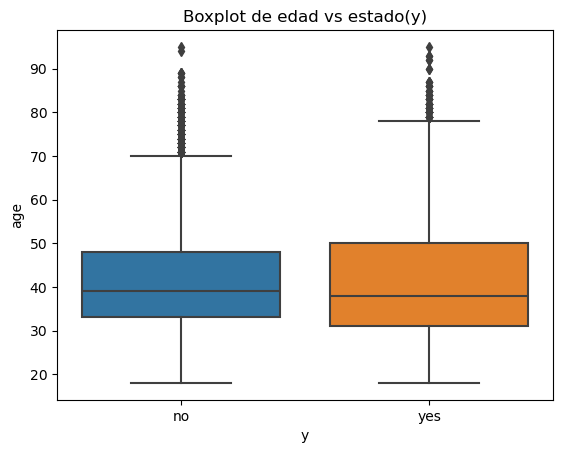

In [ ]:
#Boxplot de edad vs estado
sns.boxplot(x=banca.y,
            y=banca.age)
plt.title('Boxplot de edad vs estado(y)')
plt.show()

**_Alternativas de mejora de proceso_**

*_A continuación se obverva el canal por el que hemos tenido más éxito. Esto nos capacita para definir acciones de gran valor como mejora del proceso de telemarketing._*

In [ ]:
df_duracion_medio_exito = banca.groupby(['contact', 'y']).size().reset_index(name='Duration')

# Mostrar la tabla de contingencia
contingency_table = pd.crosstab(index=df_duracion_medio_exito['contact'],
                                columns=df_duracion_medio_exito['y'],
                                values=df_duracion_medio_exito['Duration'],
                                aggfunc='sum',
                                dropna=False)

print(contingency_table)

y             no   yes
contact               
cellular   24916  4369
telephone   2516   390
unknown    12490   530


# 6.-**_Preprocesamiento de datos_**

### 6.1 _Codificación de predictores cualitativos_

In [ ]:
banca.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [ ]:
#se crea el objeto d para codificar las variables que son categóricas
d=defaultdict(LabelEncoder)

In [ ]:
#lista de las variables categóricas
list_object=banca.columns.to_series().groupby(banca.dtypes).groups[np.dtype("object")]
list_object

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# codificamos las variables categóricas
df_banca = banca.apply(lambda x: d[x.name].fit_transform(x) if x.name in list_object else x)


In [ ]:
df_banca.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


*_Se observa(banca.head) variables que no están codificadas, para poder realizar el modelo,deben estar codificadas todas las variables cualitativas.Se procede a realizar la codificación de predictores cualitativos, para ello, importamos la función defaultdict y LabelEncoder_*

*_El objeto list_objeto(objeto tipo lista) guarda las etiquetas de las variables que requieren ser codificadas._*

*_Las funciones: fit(), para realizar el proceso de aprendizaje;fit_transform(),para realizar el proceso de aprendizaje y transformación; transform(),la transformación sobre lo ya aprendido._*



### 6.2 _Distribución de la bariable objetivo y particionamiento de datos_

**.** **_Identificar la distribución de la variable objetivo_**

In [ ]:
clases= round(pd.Series(banca.y).value_counts(sort=True)/len(banca)*100,1)
clases

y
no     88.3
yes    11.7
Name: count, dtype: float64

Text(0, 0.5, 'número de observaciones')

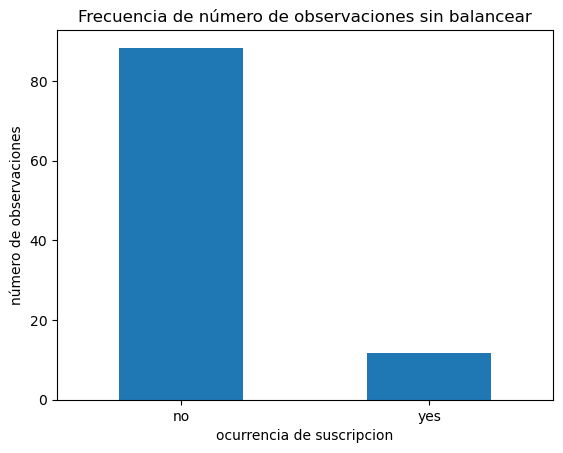

In [ ]:
#Representacion de el numero de observaciones de cada clase que pertenecen a la variable predictora "y"
import matplotlib.pyplot as plt #para visualizar como se distribuye la variable Y
%matplotlib inline
clases.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones sin balancear")
plt.xlabel("ocurrencia de suscripcion")
plt.ylabel("número de observaciones")

*_La variable objetivo es la variable "Y" donde se avaluará si un cliente es buen pagador o mal pagador.Se observa en este caso,que los datos no están balanceados ya que los datos muestran que un 88,3% de los clientes no son malos pagadores y sólo un 11,7% de estos,son malos pagadores.Los datos no balanceados resultan ser un problema ya que el modelo funcionará mal para la clase minoritaria(yes).
Por lo tanto, en este caso, es necesario realizar un balanceo_*

*_El balanceo de datos se realiza(solo) sobre los datos de entrenamiento porque esto como tal es un problema para la elaboración del modelo,mas no para los datos de testeo,por lo tanto,los datos de testeo no se balancean.Por lo tanto,previo a realizar el balanceo de datos,se realizará el particionamiento de los datos en test y train con un 30% y 70% respectivamente.Seguidamente se realiza el balanceo de la variable predictora("y") para los datos de entrenamiento_*




**.** **_Particionando los Datos de Entrenamiento_**

*_En este apartado crearemos los dataset de Train y Test para poder realizar posteriormente la predicción necesaria. Vamos a trabajar con un TrainSet de un 70% del actual y un 30% para realizar el testing._*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_banca.iloc[:,0:16].values # Guarda la matriz de los valores de los predictores
y = df_banca.iloc[:,16].values  # Guarda los valores de la taget o variable objetivo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, # Matriz de valores de los predictores
                                                   y, # Los valores del target o variable objetivo
                                                   test_size=0.3, # 30% de los datos para testeo
                                                   random_state=2024, # Valor de la semilla, para que la aleatoriedad no afecte a que tengamos diferentes muestras.
                                                   stratify=y) # toma los valores de Y

### 6.3 **_Balanceo de datos_**

*_Balanceamos los datos de entrenamiento usando las técnicas: OverSampling, UnderSampling, Smote Tomer y luego realizamos la comparación de modelos generados con las diferentes formas de balanceo:
**a)** UnderSampling, desarrollo un modelo y calculo su AIC de ese modelo;
**b)** OverSampling, desarrollo un modelo y calculo su AIC de ese modelo y
**c)** SmoteTomek, desarrollo un modelo y calculo su AIC de ese modelo._*

*_Criterio akaike, consiste en la comparación de AIC de los diferentes modelos. El que presente el menor valor de AIC, será la forma de balanceo óptima para nuestros datos_*


In [ ]:
pd.Series(y_train).value_counts(sort=True)

0    27945
1     3702
Name: count, dtype: int64

**_a) Balanceo UnderSampling_**

In [ ]:
# yes=3702....0.8
# no=x...... (0.7+0.3).......> x=4.627...
# x=6, cada 6 vecinos, n_neighbors=6
#UnderSampling
under=NearMiss(sampling_strategy=0.8,
              n_neighbors=6,# cada 6 vecinos va a tomar una muestra; el patron de vecindad busca, dispersión en la selección de observaciones de la clase mayoritaria
              version=2)

In [ ]:
x_train_under, y_train_under = under.fit_resample(x_train,y_train)

In [ ]:
clases_a = pd.Series(y_train_under).value_counts(sort=True)
clases_a

0    4627
1    3702
Name: count, dtype: int64

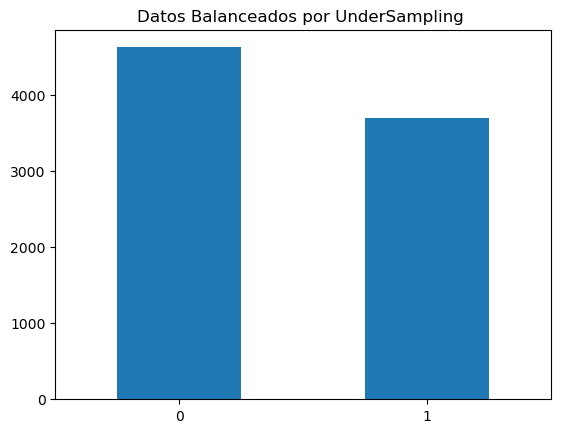

In [ ]:
#Visualizando
clases_a.plot(kind='bar',rot=0)
plt.title('Datos Balanceados por UnderSampling ')
plt.show()

**_b) Balanceo por OverSampling_** *_:genera replicas de la clase minoritaria_*

In [ ]:
over=RandomOverSampler(sampling_strategy=0.8,
                       random_state=0)

In [ ]:
x_train_over, y_train_over=over.fit_resample(x_train,y_train)

In [ ]:
clases_b = pd.Series(y_train_over).value_counts(sort=True)
clases_b

0    27945
1    22356
Name: count, dtype: int64

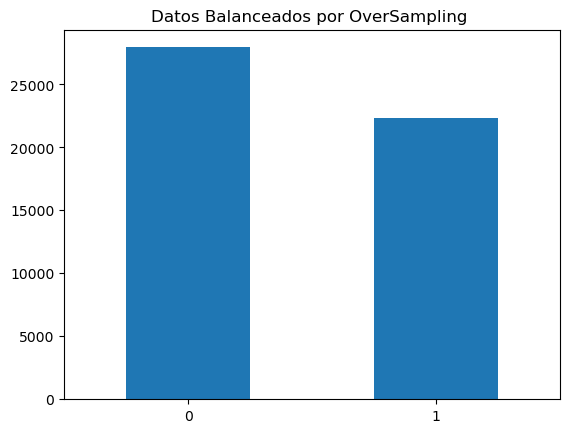

In [ ]:
#Visualizando
clases_b.plot(kind='bar',rot=0)
plt.title('Datos Balanceados por OverSampling ')
plt.show()

**_c) Balanceo por Smote Tomek_** *_:aplica de manera simultanea Oversampling y UnderSampling_*

In [ ]:
# Instanciamos SMOTETomek con el valor adecuado
st = SMOTETomek(sampling_strategy=0.8)  # 0.8 indica la relación entre la clase minoritaria y mayoritaria

In [ ]:
# Balanceamos los datos
x_train_st, y_train_st = st.fit_resample(x_train, y_train)

In [ ]:
clases_c = pd.Series(y_train_st).value_counts(sort=True)
clases_c

0    27305
1    21716
Name: count, dtype: int64

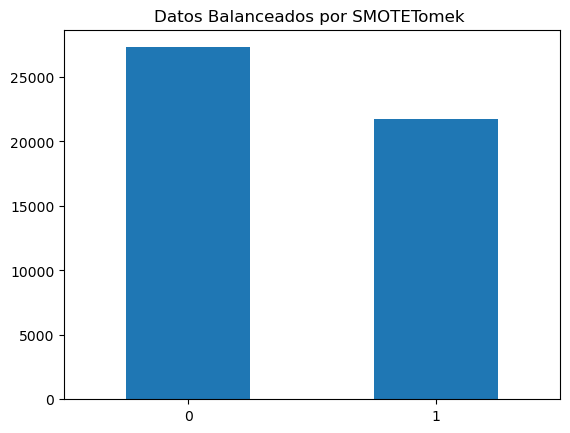

In [ ]:
#Visualizando
clases_c.plot(kind='bar',rot=0)
plt.title('Datos Balanceados por SMOTETomek ')
plt.show()

**_Creamos los modelos para elegir la técnica correcta de balanceo_**

In [ ]:
import statsmodels.api as sm

**_a) Modelo con los datos sin balancear_**

In [ ]:
x1_train = sm.add_constant(x_train)# Agregar un intercepto a los datos si es necesario (esto se hace con sm.add_constant)

# Ajuste del  modelo
model1 = sm.Logit(y_train, x_train)  # Variables endógena y exógena
resultado = model1.fit()

# Ver los resultados del modelo
print(resultado.summary2())

Optimization terminated successfully.
         Current function value: 0.273930
         Iterations 8
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.241     
Date:               2025-01-03 14:15 AIC:              17370.1231
No. Observations:   31647            BIC:              17503.9215
Df Model:           15               Log-Likelihood:   -8669.1   
Df Residuals:       31631            LL-Null:          -11420.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     8.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       -0.0225     0.0015   -14.6643   0.0000   -0.0255   -0.0195
x2       -0.0175     0.0062    -2.8173   0.0048   -0.0296 

**_b) Modelo con los datos balanceados por UnderSampling_**

In [ ]:
x1_train_under=sm.add_constant(x_train_under)
# Ajuste del  modelo
model2 = sm.Logit(y_train_under, x1_train_under)  # Variables endógena y exógena
resultado2 = model2.fit()

# Ver los resultados del modelo
print(resultado2.summary2())

Optimization terminated successfully.
         Current function value: 0.407689
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.407    
Date:               2025-01-03 14:15 AIC:              6825.2793
No. Observations:   8329             BIC:              6944.7468
Df Model:           16               Log-Likelihood:   -3395.6  
Df Residuals:       8312             LL-Null:          -5721.8  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     7.0000           Scale:            1.0000   
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
const   -1.1063     0.2544    -4.3491   0.0000   -1.6049   -0.6078
x1       0.0044     0.0028     1.5471   0.1218   -0.0012    0.0099
x2 

**_c) Modelo con los datos balanceados por Over Sampling_**

In [ ]:
x1_train_over=sm.add_constant(x_train_over)
# Ajuste del  modelo
model3 = sm.Logit(y_train_over, x1_train_over)  # Variables endógena y exógena
resultado3 = model3.fit()

# Ver los resultados del modelo
print(resultado3.summary2())


Optimization terminated successfully.
         Current function value: 0.451896
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.342     
Date:               2025-01-03 14:15 AIC:              45495.6342
No. Observations:   50301            BIC:              45645.6725
Df Model:           16               Log-Likelihood:   -22731.   
Df Residuals:       50284            LL-Null:          -34555.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -2.6504     0.0993   -26.6789   0.0000   -2.8451   -2.4557
x1        0.0100     0.0011     9.0129   0.0000    0.0078 

**_d) Modelo con los datos balanceados por Smote Tomek_**

In [ ]:
x1_train_st=sm.add_constant(x_train_st)
# Ajuste del  modelo
model4 = sm.Logit(y_train_st, x1_train_st)  # Variables endógena y exógena
resultado4 = model4.fit()

# Ver los resultados del modelo
print(resultado4.summary2())



Optimization terminated successfully.
         Current function value: 0.360057
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.476     
Date:               2025-01-03 14:15 AIC:              35334.7207
No. Observations:   49021            BIC:              35484.3207
Df Model:           16               Log-Likelihood:   -17650.   
Df Residuals:       49004            LL-Null:          -33659.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     1.5444     0.1102    14.0140   0.0000    1.3284    1.7603
x1       -0.0219     0.0013   -16.6715   0.0000   -0.0244 

**.** *_Data sin balancear, model1: **AIC**=17370.1231_*

**.** *_Data balanceada por Under Sampling, model2: **AIC**=6825.2793_*

**.** *_Data balanceada por Over Sampling, model3: **AIC**=45495.6342_*

**.** *_Data balanceada por Smote Tomer, model4: **AIC**= 35791.2629_*

**.** **Conclusión:** *_Data balanceada por Under Sampling es la forma óptica de balanceo para este caso, tiene el menor AIC, apartir de ahora se debe trabajar con los datos y_train_under, x_train_under._*

### 6.4 **_Discretización de datos_**

*_Los datos de las variables predictoras deben estar discretizados para poder ingresar al modelo Naive Bayes. Antes de discretizar, se combierte los datos en data frame_*

In [ ]:
#Convirtiendo el DF de entrenamiento con datos balanceados
columnas=df_banca.columns.to_list()
print(columnas)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [ ]:
#Establecer nuestras etiquetas de predictores y target
predictores=columnas[0:16]
y=columnas[16]
print(predictores)
print(y)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
y


In [ ]:
#Armando el DataFrame de Entrenamiento
x_train_under=pd.DataFrame(x_train_under,columns=predictores)
y_train_under=pd.DataFrame(y_train_under,columns=[y])
df_train=pd.concat([x_train_under,y_train_under],axis=1)
df_train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,43,0,1,1,0,25741,1,0,2,30,8,464,2,-1,0,3,0
1,51,4,1,2,0,25856,0,0,0,14,1,129,2,-1,0,3,0
2,59,5,1,1,0,25947,0,0,0,13,1,292,2,-1,0,3,0


In [ ]:
len(df_train) # son los datos de entrenamiento balanceados por Under Sampling

8329

In [ ]:
#Armando el DataFrame de Testeo
x_test=pd.DataFrame(x_test,columns=predictores)
y_test=pd.DataFrame(y_test,columns=[y])
df_test=pd.concat([x_test,y_test],axis=1)

In [ ]:
len(df_test)

13564

**_Discretización de datos_**

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
#Instanciamos un objeto de clase KBinsDiscretizer
kmeans=KBinsDiscretizer(n_bins=2, #dos categorías
                     encode='ordinal',
                     strategy='kmeans')

In [ ]:
#Discretizando variables seleccionadas
data_kmeans_train=kmeans.fit_transform(df_train[['age','balance','day','month','duration','campaign','pdays','previous'  ]])
data_kmeans_test=kmeans.fit_transform(df_test[['age','balance','day','month','duration','campaign','pdays','previous']])

In [ ]:
data_kmeans_train=pd.DataFrame(data_kmeans_train,columns=['age','balance','day','month','duration','campaign','pdays','previous' ])
data_kmeans_test=pd.DataFrame(data_kmeans_test, columns=['age','balance','day','month','duration','campaign','pdays','previous' ])

In [ ]:
#Actualizando las variables discretizadas train
df_train.age=data_kmeans_train.age
df_train.balance=data_kmeans_train.balance
df_train.day=data_kmeans_train.day
df_train.month=data_kmeans_train.month
df_train.duration=data_kmeans_train.duration
df_train.campaign=data_kmeans_train.campaign
df_train.pdays=data_kmeans_train.pdays
df_train.previous=data_kmeans_train.previous



In [ ]:
#Actualizando las variables discretizadas test
df_test.age=data_kmeans_test.age
df_test.balance=data_kmeans_test.balance
df_test.day=data_kmeans_test.day
df_test.month=data_kmeans_test.month
df_test.duration=data_kmeans_test.duration
df_test.campaign=data_kmeans_test.campaign
df_test.pdays=data_kmeans_test.pdays
df_test.previous=data_kmeans_test.previous

In [ ]:
df_test.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.0,0,1,1,0,0.0,1,0,2,0.0,1.0,0.0,0.0,0.0,0.0,3,0
1,0.0,1,1,1,0,0.0,1,1,2,1.0,1.0,0.0,0.0,0.0,0.0,3,0
2,0.0,0,0,1,0,0.0,1,1,2,1.0,1.0,0.0,0.0,0.0,0.0,3,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8329 non-null   float64
 1   job        8329 non-null   int64  
 2   marital    8329 non-null   int64  
 3   education  8329 non-null   int64  
 4   default    8329 non-null   int64  
 5   balance    8329 non-null   float64
 6   housing    8329 non-null   int64  
 7   loan       8329 non-null   int64  
 8   contact    8329 non-null   int64  
 9   day        8329 non-null   float64
 10  month      8329 non-null   float64
 11  duration   8329 non-null   float64
 12  campaign   8329 non-null   float64
 13  pdays      8329 non-null   float64
 14  previous   8329 non-null   float64
 15  poutcome   8329 non-null   int64  
 16  y          8329 non-null   int32  
dtypes: float64(8), int32(1), int64(8)
memory usage: 1.0 MB


# 7.-**_Entrenamiento del Modelo_**

In [ ]:
xtrain,ytrain=df_train.iloc[:,0:16].values,df_train.iloc[:,16].values
xtest,ytest=df_test.iloc[:,0:16].values,df_test.iloc[:,16].values


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Instanciar un objeto de clase GaussianNB
modelo_nb= GaussianNB()

In [ ]:
#Aprendemos de los datos de entrenamiento
modelo_nb.fit(xtrain,ytrain)

GaussianNB()

In [ ]:

# La función predic_proba(): ayuda a predecir las probabilidades de "y=yes" o "y=no".

In [ ]:
#Calculamos los valores predichos para la Data de Entrenamiento
# La función predict(): ayuda a predecir la categoría
ypredicho_train=modelo_nb.predict(xtrain)
ypredicho_train


array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
# La función predic_proba(): ayuda a predecir las probabilidades de "y=yes" o "y=no".
ypredicho_proba_train=modelo_nb.predict_proba(xtrain)
ypredicho_proba_train

array([[9.99999963e-01, 3.73106806e-08],
       [9.99997021e-01, 2.97907949e-06],
       [9.99997145e-01, 2.85483325e-06],
       ...,
       [7.26237200e-02, 9.27376280e-01],
       [1.75339585e-03, 9.98246604e-01],
       [8.07816848e-01, 1.92183152e-01]])

### 7.1 **_Performance para los datos de entrenamiento_**

In [ ]:
#Establecer nuesros nombres de etiqueta
label_names=[0,1] # y=0(no=cliente no moroso), y=1(si=cliente moroso)

In [ ]:
#Analizando la performance del modelo para los Datos de Entrenamiento
import model_evaluation_utils as meu
meu.display_model_performance_metrics(true_labels=ytrain,
                                     predicted_labels=ypredicho_train,
                                     classes=label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7078
Precision: 0.7152
Recall: 0.7078
F1 Score: 0.6975

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      4627
           1       0.75      0.52      0.61      3702

    accuracy                           0.71      8329
   macro avg       0.72      0.69      0.69      8329
weighted avg       0.72      0.71      0.70      8329


Prediction Confusion Matrix:
------------------------------
      0     1
0  3971   656
1  1778  1924


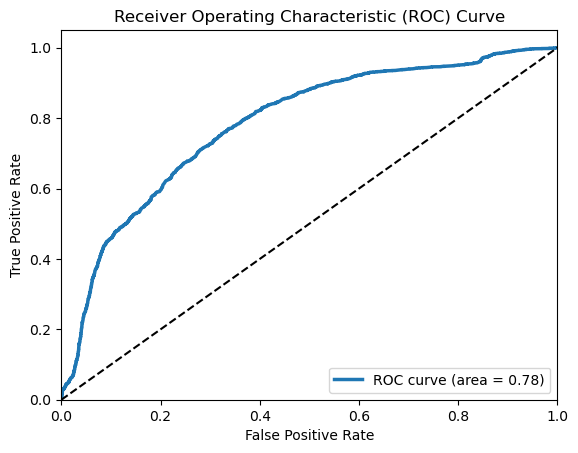

In [ ]:
meu.plot_model_roc_curve(modelo_nb,xtrain,ytrain)

In [ ]:
#      0           1
# 0  3971(VN)   656(FP)
# 1  1778(FN)  1924(VP)


**_Accuracy_** *_= (VP+VN)/(Total de cassos)=(1924+3971)/(3971+656+1778+1924)=0.707768 Lo que indica que el modelo tiene una exactitud del 70.78% sobre los datos de entrenamiento. Esto significa que de cada 100 veces, 70.78 veces, el modelo predice correctamente si un cliente SI suscribirá(y=1) o no suscribirá(y=0) el depósito a plazo bancario._*

**_Precisión_** *_= Valor predictivo positivo(VP+) = VP/(FP+VP).De las veces que el modelo predijo que un cliente suscribiría un deposito a plazo(y=1), un 71.52% de esas predicciones fueron correctas.Esto es una medida de la fiabilidad del modelo cuando predice y=1._*

**_Verdaderos positivos(VP)_** *_ : 1924 (cuando el modelo predijo correctamente que un cliente suscribiría un depósito a plazo)._*

**_Verdadero negativo(VN)_** *_: 3971 (cuando el cliente no suscribió un depósito y el modelo predijo correctamente que no lo haría)._*

**_Falsos positivos(FP)_** *_: 656 (cuando el modelo predijo incorrectamente que un cliente suscribiría un depósito a plazo, pero en realidad no lo hizo)._*

**_Falsos negativos(FN)_** *_: 778 (cuando el modelo predijo incorrectamente que el cliente no suscribiría un depósito a plazo, pero en realidad lo hizo)._*

**_Recall (Sensibilidad o Tasa de verdaderos positivos)_** *_: 0.7078.El recall del 70.78% indica que el modelo identificó correctamente el 70.78% de los clientes que realmente suscribirían un depósito a plazo._*

**_Curva ROC(AUC)_** *_: Un AUC de 0.78 en los datos de entrenamiento indica que el modelo tiene una capacidad razonablemente buena para discriminar entre clientes que suscribirán(Y=1) y los que no suscribirán(Y=0) el depósito a plazo. Es decir, el modelo tiene una buena capacidad para clasificar a los clientes de manera correcta en cuanto a la suscripción al depósito a plazo._*

### 7.2 **_Performance para los datos de testeo o prueba_**

In [ ]:
#Calculando los valores predichos
ypredicho_test=modelo_nb.predict(xtest)

In [ ]:
#Evaluando la performance para el testing
meu.display_model_performance_metrics(true_labels=ytest,
                                      predicted_labels=ypredicho_test,
                                      classes=label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7841
Precision: 0.8581
Recall: 0.7841
F1 Score: 0.8121

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     11977
           1       0.29      0.57      0.38      1587

    accuracy                           0.78     13564
   macro avg       0.61      0.69      0.62     13564
weighted avg       0.86      0.78      0.81     13564


Prediction Confusion Matrix:
------------------------------
      0     1
0  9739  2238
1   690   897


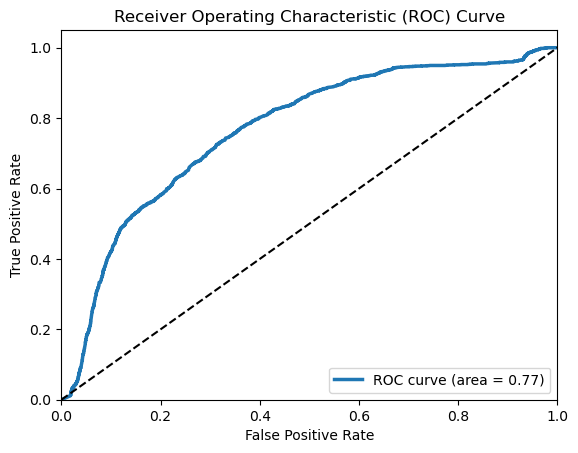

In [ ]:
meu.plot_model_roc_curve(modelo_nb,xtest,ytest)

**_Accuracy_** *_=0.7841.  La exactitud de 78.41% en los datos de prueba indica que el modelo tiene una precisión general bastante buena para predecir si un cliente suscribirá o no suscribirá un depósito a plazo._*

**_Precisión_** *_= 0.8581. La precisión en los datos de prueba es del 85.81%, lo que significa que el modelo fue bastante acertado cuando predijo que un cliente suscribiría un depósito a plazo._*

**_Verdaderos positivos(VP)_** *_ : 897 (cuando el modelo predijo correctamente que el cliente suscribiría el depósito a plazo)._*

**_Verdadero negativo(VN)_** *_: 9739 (cuando el cliente no suscribió el depósito a plazo y el modelo predijo correctamente que no lo haría)._*

**_Falsos positivos(FP)_** *_: 2238 (cuando el modelo predijo incorrectamente que el cliente suscribiría un depósito a plazo, pero en realidad no lo hizo)._*

**_Falsos negativos(FN)_** *_: 690 (cuando el modelo predijo incorrectamente que el cliente no suscribiría el depósito a plazo, pero en realidad lo hizo)._*

**_Recall (Sensibilidad)_** *_: 0.7841.El recall de 78.41% significa que el modelo identificó correctamente el 78.41% de los clientes que realmente suscribirían un depósito a plazo._*

**_Curva ROC(AUC)_** *_: Un AUC de 0.77 en los datos de prueba muestra que el modelo sigue teniendo una buena capacidad discriminativa en los datos no vistos. La ligera disminución en el AUC de los datos de entrenamiento a los de prueba sugiere que el modelo sigue generalizando bien, sin sobreajustarse, pero con una ligera pérdida en su capacidad para diferenciar entre las clases._*

# 8.-**_Conclusiones_**

**.** *_El modelo Naive Bayes tiene un buen desempeño para predecir si un cliente suscribirá un depósito a plazo(y=1)  o no lo suscribirá(y=0)._*

**.** *_En términos de precisión y recall, el modelo muestra un buen equilibrio, especialmente en los datos de prueba, donde la precisión (85.81%) y el recall (78.41%) son bastante altos._*

**.** *_El AUC de 0.78 en entrenamiento y 0.77 en prueba confirma que el modelo tiene una buena capacidad de discriminación, lo que significa que puede distinguir bien entre los clientes que suscribirán el depósito a plazo y los que no._*

**.** *_En resumen, el modelo parece estar bien ajustado para predecir la variable objetivo, es decir, si un cliente suscribirá un depósito a plazo o no, con un buen desempeño general tanto en el conjunto de entrenamiento como en el de prueba._*
